In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
ds = pd.read_csv('D:\Simplilearn\Final_project\Project_3\Online_Retail.csv')
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
ds.shape

(541909, 8)

In [11]:
ds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
#Let's drop NA values:
ds = ds.dropna()
ds.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
ds.shape

(406829, 10)

 RFM:

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

data preprocessing 

In [14]:
ds['CustomerID'] = ds['CustomerID'].astype(str)


In [16]:
#Create new column Amount which is Quantity*Unitprice:
ds['Amount'] = ds['Quantity']*ds['UnitPrice']
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [18]:
#After that we grouped the sum of amount based on customer ID, giving us total amount spent by each customer:
rfm_ds_m = ds.groupby('CustomerID')['Amount'].sum()
rfm_ds_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [19]:
rfm_ds_m.reset_index()
rfm_ds_m.columns = ['CustomerID', 'Amount']
rfm_ds_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [21]:
#Now we find the frequency or the number of times the customer has made purchase
rfm_ds_f = ds.groupby('CustomerID')['InvoiceNo'].count()
rfm_ds_f = rfm_ds_f.reset_index()
rfm_ds_f.columns = ['CustomerID', 'Frequency']
rfm_ds_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [22]:
#Now we need to find the recency, which is the time between the purchases.
#After that we will use the invoice date and convert the date format in %d-%m-%Y %H:%M.
#Then we will find the max date in the data set
#then we will substract the invoice dates from the max date. This will give us the difference
#Then we will group by customerID based on the dates difference.
#Then we will convert the whole date difference into number of days which will give us the recency.

ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(ds['InvoiceDate'])
ds['Diff'] = max_date - ds['InvoiceDate']
rfm_ds_p = ds.groupby('CustomerID')['Diff'].min()
rfm_ds_p = rfm_ds_p.reset_index()
rfm_ds_p.columns = ['CustomerID','Diff']
rfm_ds_p['Diff'] = rfm_ds_p['Diff'].dt.days
print(rfm_ds_p)

     CustomerID  Diff
0       12346.0   325
1       12347.0     1
2       12348.0    74
3       12349.0    18
4       12350.0   309
...         ...   ...
4367    18280.0   277
4368    18281.0   180
4369    18282.0     7
4370    18283.0     3
4371    18287.0    42

[4372 rows x 2 columns]


In [25]:
#After that we will join together these columns using inner join to give us the final RFM data set

rfm_ds_final = pd.merge(rfm_ds_m,rfm_ds_f,on='CustomerID',how='inner')
rfm_ds_final = pd.merge(rfm_ds_final,rfm_ds_p,on='CustomerID',how='inner')
rfm_ds_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
print(rfm_ds_final.head())

  CustomerID   Amount  Frequency  Recency
0    12346.0     0.00          2      325
1    12347.0  4310.00        182        1
2    12348.0  1797.24         31       74
3    12349.0  1757.55         73       18
4    12350.0   334.40         17      309


Outlier

In [26]:
#We will now find out outliers using IQR. We will remove the outliers which are not in IQR range.
Q1 = rfm_ds_final.Amount.quantile(0.05)
Q3 = rfm_ds_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Amount >= Q1 - 1.5*IQR) & (rfm_ds_final.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm_ds_final.Recency.quantile(0.05)
Q3 = rfm_ds_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Recency >= Q1 - 1.5*IQR) & (rfm_ds_final.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm_ds_final.Frequency.quantile(0.05)
Q3 = rfm_ds_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Frequency >= Q1 - 1.5*IQR) & (rfm_ds_final.Frequency <= Q3 + 1.5*IQR)]

In [27]:
rfm_ds_final.shape

(4293, 4)

Scaling

In [28]:
#Now we will perform scaling on the columns in order to reduce the deviance compared to each other
X = rfm_ds_final[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_ds_scaled = scaler.fit_transform(X)

In [29]:
rfm_ds_scaled = pd.DataFrame(rfm_ds_scaled)
rfm_ds_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_ds_scaled.head()

,Amount,Frequency,Recency
0,0.238663,0.001395,0.871314
1,0.478571,0.252441,0.002681
2,0.338703,0.041841,0.198391
3,0.336494,0.100418,0.048257
4,0.257277,0.022315,0.828418


# K Means clustering model creation

In [30]:
#We will start with 3 clusters. We will create the model and fit the model.
#After that we will label it 

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_ds_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

[1 2 0 ... 1 0 0]


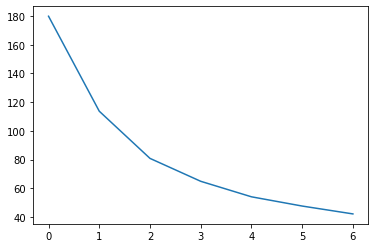

In [31]:
#After that we will use wss method for different values of no. of clusters. Then we will plot a graph determining the
#significant difference point the slope. here it would be 2 or 3. 
#3 would be a better choice because if a point is between 2 clusters at a same distance, model would not be proper. That is why 
#3rd clusters resolves the issue.

wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_ds_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(wss)

#You can use silhoutte analysis. 

Silhouette Analysis

The value of the silhouette score range lies between -1 to 1.
A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [32]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_ds_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_ds_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5889064222823147
For n_clusters=3, the silhouette score is 0.5481982074749173
For n_clusters=4, the silhouette score is 0.5038222293825055
For n_clusters=5, the silhouette score is 0.44819871714813087
For n_clusters=6, the silhouette score is 0.40402678957502025
For n_clusters=7, the silhouette score is 0.3859654340974967
For n_clusters=8, the silhouette score is 0.3864727497411944


In [ ]:
#Here for 2 cluster, silhoutte score value is always maximum. So you can ignore it, and choose 3.

In [33]:
#After that we can append the labels into the data set as columns:
# kmeans = KMeans(n_clusters=3, max_iter=50)
# kmeans.fit(rfm_ds_scaled)
# print(kmeans.labels_)
rfm_ds_final['Cluster_Id'] = lbs
rfm_ds_final.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


In [39]:
rfm_ds_final.shape

(4293, 5)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

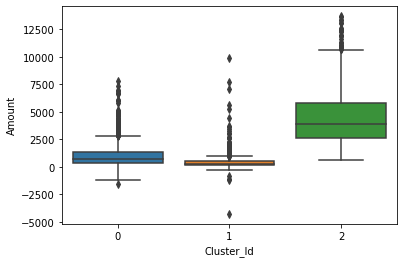

In [34]:
#Here we are plotting a box plot between clusterID and amount:

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_ds_final)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

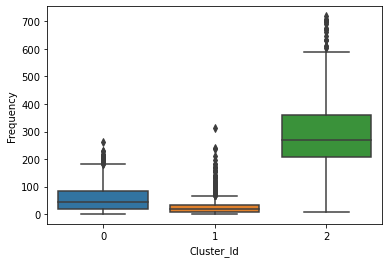

In [35]:
#Here we are plotting a box plot between clusterID and Frequency:

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_ds_final)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

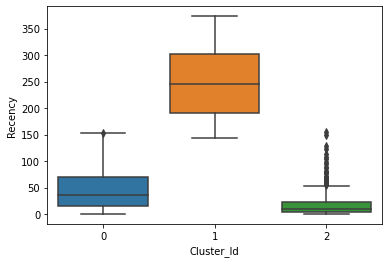

In [36]:
#Here we are plotting a box plot between clusterID and Recency:

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_ds_final)

In [ ]:
#After EDA, we found that people in cluster 2 has more spending than other two clusters
#People in cluster 2 also has higher number of frequency of buying items than other two clusters
#People in cluster 1 have higher recency than other two clusters


In [38]:
#In order to export the data frame for further analysis:
ds.to_csv("Online_Retail.csv",index=False)

In [41]:
rfm_ds_final.to_csv("Online_RFM01.csv",index=False)

In [45]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

In [46]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


<AxesSubplot:>

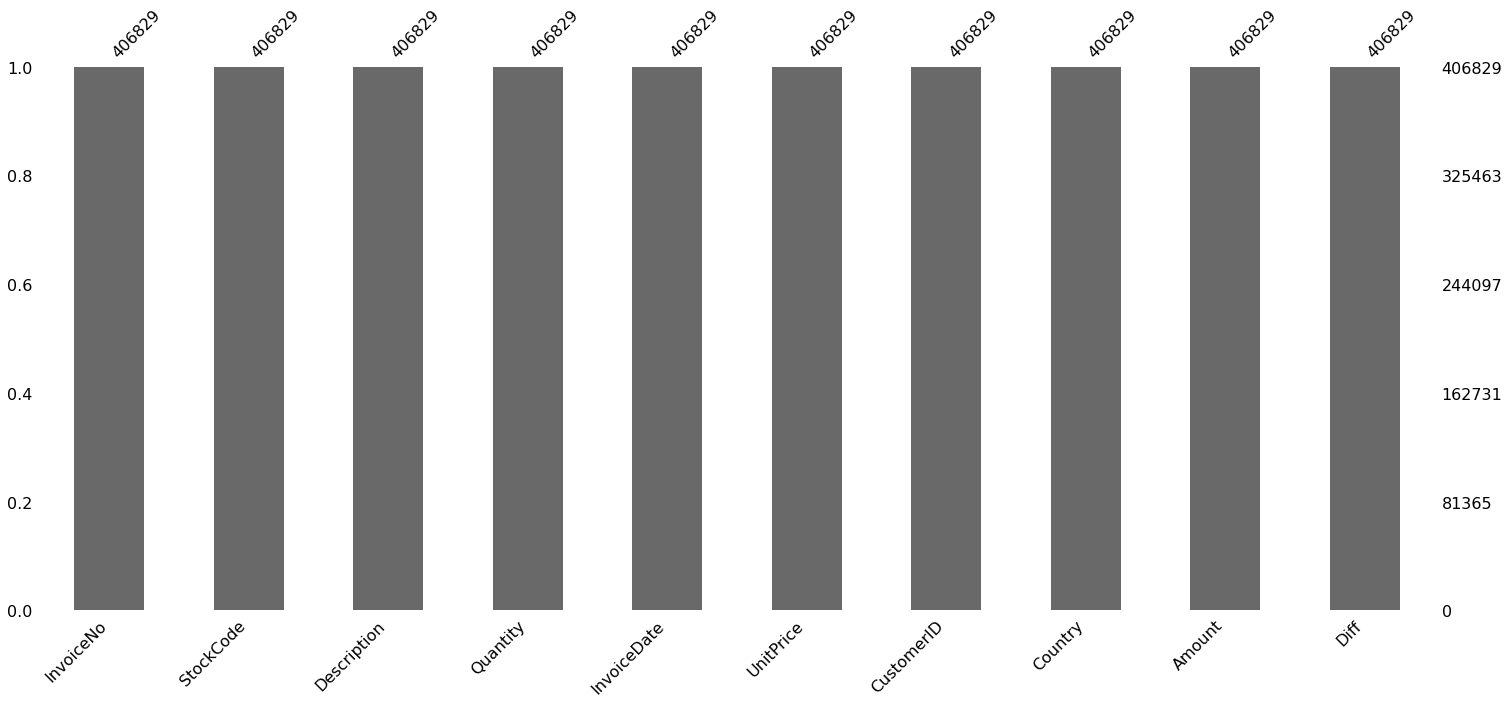

In [47]:
msno.bar(ds)

In [48]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    406829 non-null  object         
 1   StockCode    406829 non-null  object         
 2   Description  406829 non-null  object         
 3   Quantity     406829 non-null  int64          
 4   InvoiceDate  406829 non-null  datetime64[ns] 
 5   UnitPrice    406829 non-null  float64        
 6   CustomerID   406829 non-null  object         
 7   Country      406829 non-null  object         
 8   Amount       406829 non-null  float64        
 9   Diff         406829 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), timedelta64[ns](1)
memory usage: 34.1+ MB


# Assigned the cohorts and calculated the monthly offset

In [49]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1)

# Create transaction_date column based on month and store in InvoiceMonth
ds['InvoiceMonth'] = ds['InvoiceDate'].apply(get_month)

# Grouping by customer_id and select the InvoiceMonth value
grouping = ds.groupby('CustomerID')['InvoiceMonth']

# Assigning a minimum InvoiceMonth value to the dataset
ds['CohortMonth'] = grouping.transform('min')

ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,2010-12-01,2010-12-01


Calculating time offset in Month as Cohort Index

Calculating time offset for each invoice allows you to evalauate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months and days for invoice and Cohort Date using the get_date_int() function.

In [50]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, _ = get_date_int(ds, 'InvoiceMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(ds, 'CohortMonth')

Now we will:

We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
then calculate the total Months difference between the two.
This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [57]:
#  Get the  difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month


""" Extract the difference in months from all previous values
 "+1" in added at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """

ds['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(ds.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Amount  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   

               Diff InvoiceMonth CohortMonth  CohortIndex  
0 373 days 04:24:00   2010-12-01  2010-12-01            1  
1 373 days 04:24:00 

Here, at first we create a groupby() object with CohortMonth and CohortIndex and store it as grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table by passing

CohortMonth to the index parameter,
CohortIndex to the columns parameter,
customer_id to the values parameter.
and rounding it up to 1 digit, and see what we get.

In [58]:
# Counting daily active user from each cohort
grouping = ds.groupby(['CohortMonth', 'CohortIndex'])

# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [59]:
# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'CustomerID')
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [61]:
cohort_counts.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate business metrics: Retention rate

The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

Now that we have count of retained customer for each cohortMonth and cohortIndex. We will calculate retention rate for each Cohort.

We will create a pivot table for this purpose.

In [62]:
"""
Select the first column and store it to cohort_sizes as size of cohort === no. active customer in first day
We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
"""

cohort_sizes = cohort_counts.iloc[:,0]

"""
We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index
"""

retention = cohort_counts.divide(cohort_sizes, axis=0)

In [63]:
"""
this matrix has 2 axes: 
x - cohort date (beginning of month); y - cohort maturity (in months)
every cell is a unique count of customer for the x and y

if a customer's last order was in period 2,
they were active in period 0, 1 as well
same for other periods

"""

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention Rate dataframe represent Customer retained across Cohorts. We can read it as following:

Index value represents the Cohort

Columns represent the number of months since current Cohort

For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in 3rd Month.

Also you can see from the retention Rate DataFrame:

Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customers signed up in 1st Month

Retention Rate may increase or decrease in Subsequent Indexes.

Values towards BottomRight have a lot of NaN values.

# Visualizing the retention rate

Before we starting plotting our heatmap, let's set the index of our Retention rate dataframe to a more readable string format

In [64]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

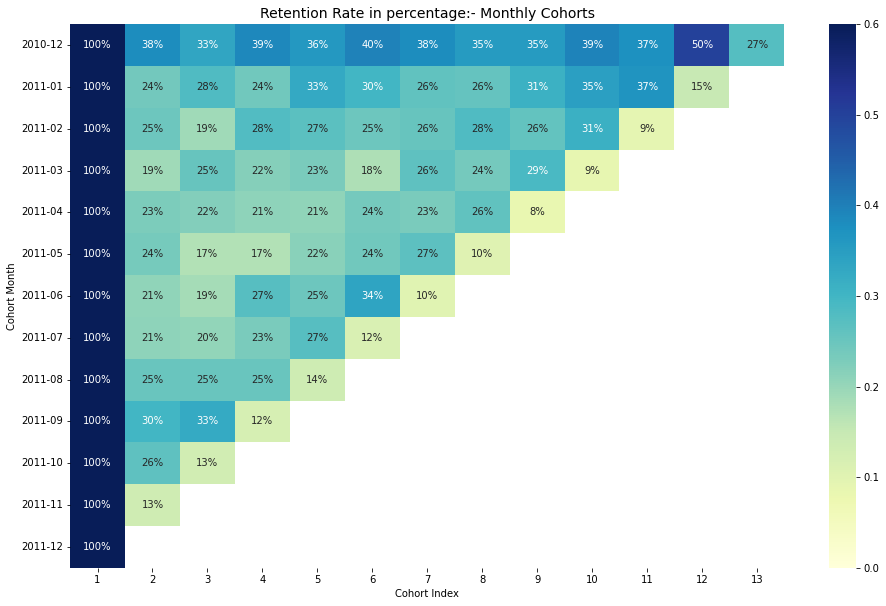

In [65]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

# Interpreting the retention rate

The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

The darker the blue shades higher the values. Thus, if we see in 2010-12 cohort Month in 12th Cohort Index, we see the dark blue shade with 50% which means that 50% of cohorts that signed in December 2010 were active 12 months later.